In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10) #size of the image to display

In [2]:
def rotation(image, angle):
    radians=np.radians(angle) #convert angle in degrees to radians
    h, w=image.shape[:2] #get width and height of image
    R=np.array([
        [np.cos(radians), -np.sin(radians), 0],
        [np.sin(radians), np.cos(radians), 0],
    ]) # get the affine transformation matrix

    dst=cv2.warpAffine(image, R, (w, h)) #apply warpaffine

    return dst

In [3]:
def shearing(image, tx):
    h, w=image.shape[:2] #get the height and width
    Sh=np.array([
        [1, tx, 0],
        [0, 1, 0],
    ]) #shearing affine transformation

    dst=cv2.warpAffine(image, Sh, (w,h)) #apply warpaffine

    return dst

In [4]:
def translation(image, tx):
    h,w=image.shape[:2] #get the height and width of the image
    M=np.float32([
        [1,0,tx],
        [0,1,1]
    ]) #affine transformation matrix

    dst=cv2.warpAffine(image, M, (w,h)) #apply warpaffine

    return dst

In [10]:
def feature_matching(img1, img2):
    gray1, gray2=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY), cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) #convert both images to grayscale

    sift=cv2.SIFT_create() #make sift object
    #get keypoints and descriptors for both the grayscaled images
    keypoints1, descriptor1=sift.detectAndCompute(gray1, None)
    keypoints2, descriptor2=sift.detectAndCompute(gray2, None)

    bf=cv2.BFMatcher(cv2.NORM_L1, crossCheck=True) #brute force matcher
    matches=bf.match(descriptor1, descriptor2)# matches the 2 descriptor of the 2 images respectively

    matches=sorted(matches, key=lambda x:x.distance) #sort matches according to the distances
    print('Number of matches: ',len(matches))
    img3=cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:30], img2, flags=2) #draw 50 best matches on the images

    plt.imshow(img3) #plot the image
    plt.show()

In [11]:
def main(filename):
    img=cv2.imread(filename) #read the image at the filename
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert BGR to RGB because RGB required in jupyter notebooks
    rotated=rotation(img, 20) #apply rotation
    sheared=shearing(rotated, 0.5) #apply shearing to the rotated image
    translated=translation(sheared, 20) #apply translation to the sheared and rotated image

    cv2.imshow('Input', img) #display the original image
    cv2.imshow('Final Output', translated) #display the transformed image

    #a
    feature_matching(img, translated) #use sift for feature matching

    #b
    flipped=cv2.flip(translated, 0)
    feature_matching(img, flipped) #use sift for feature matching

    cv2.waitKey(0) #waitkey
    cv2.destroyAllWindows() #destroy windows


Number of matches:  252


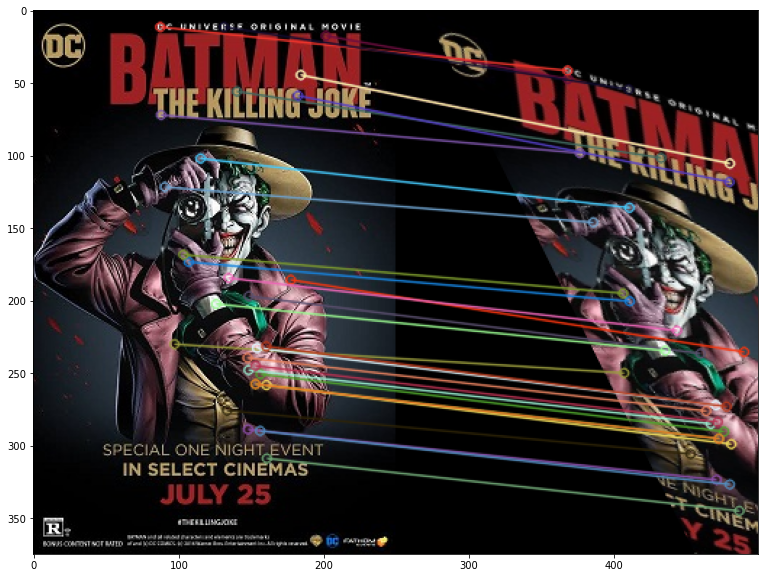

Number of matches:  185


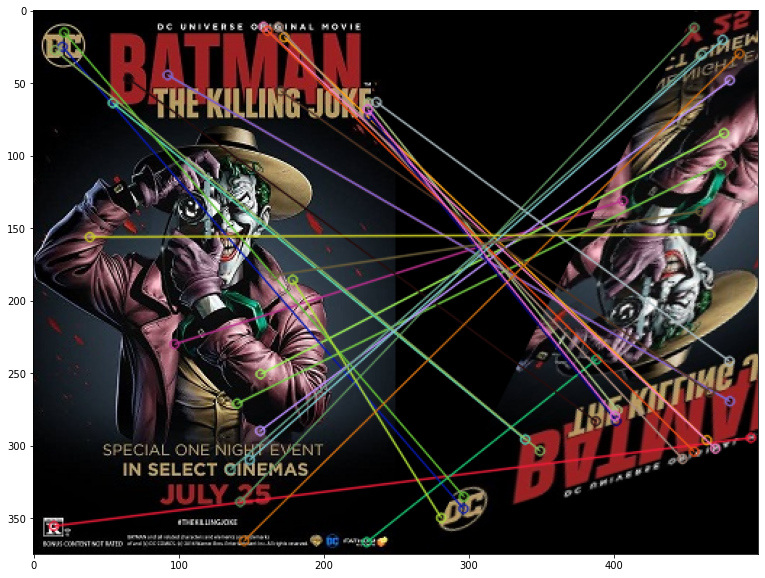

In [12]:
main('tkj.jpg')

Matches in Image and Transformed: 252

Matches in Image and Flipped: 185